
## Bike sharing assignment

#### Problem Statement:

BoomBikes is a bike sharing provider in the US which offers renting/ of bikes for a payment.  BoommBikes has seen a significant drop in revenue due to the Corona pandemic.  The company is aiming to create a good business strategy to accelerate its revenue once the pandemic comes to an end.  With this objective, BoomBikes is looking to understand the different factors that demand for the shared bikes in the American market. he company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by Boom Bikes to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Step 1: Reading and Understanding the Data

Import the necessary libraries and load the dataset

In [80]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [81]:
##  import the libraries

import numpy as np
import pandas as pd

In [82]:
##  read the dataset into a dataframe

day = pd.read_csv("day.csv")

In [83]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [84]:
day.shape

(730, 16)

In [85]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**As observed there are no nulls in data**

In [86]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Visualize the data to understand if there is any strong correlation between the target variable (cnt) and the independent variables and also check if there is any mulicollinearity between the independent variables

In [87]:
# import the libraries for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Demand by date')

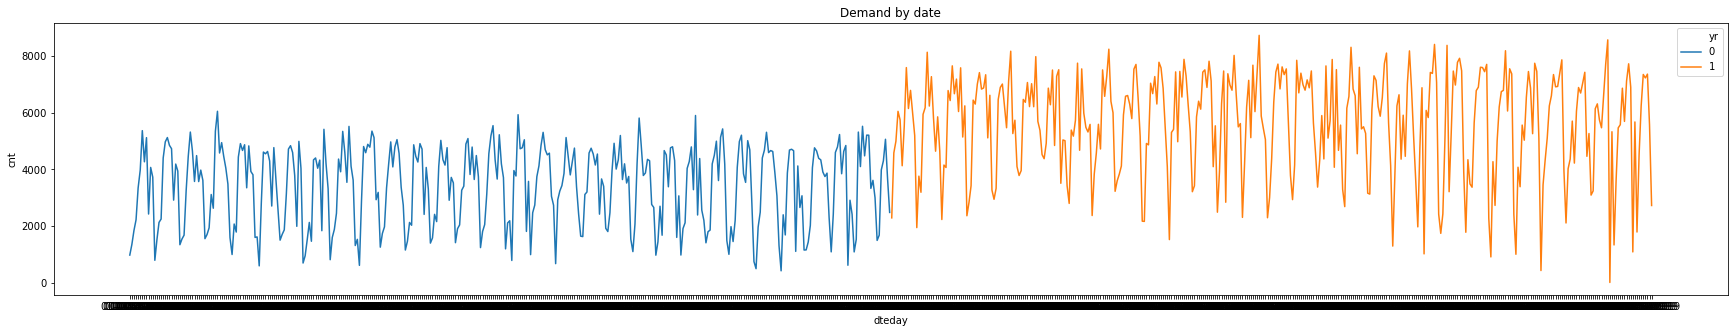

In [88]:
## create a line plot by target variable and date to visualize the demand across years

plt.figure(figsize=(30, 5))
sns.lineplot(x = 'dteday', y = 'cnt', estimator=np.sum, data = day, hue='yr')
plt.title('Demand by date')

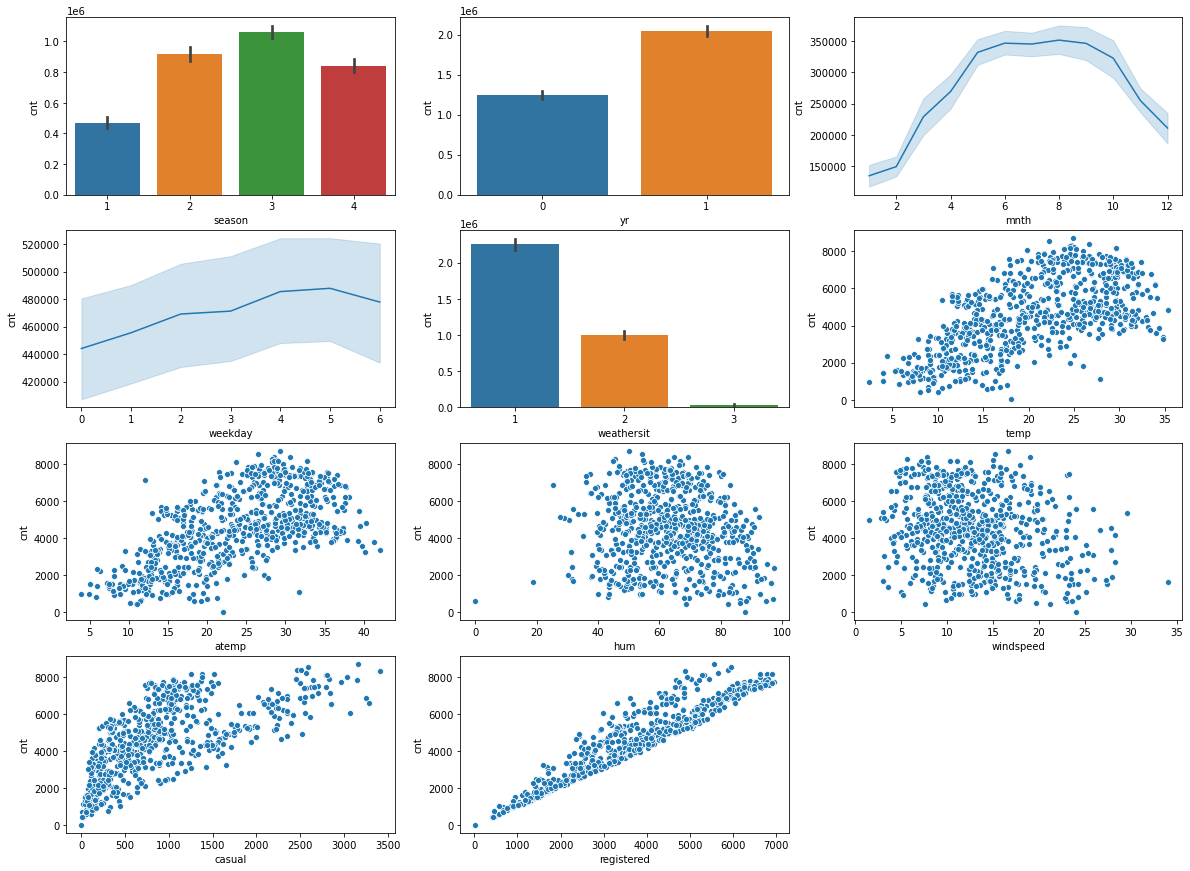

In [89]:
##  plot to understand the relationship between the target variable(cnt) and independent variables (numerical and categorial)

plt.figure(figsize=(20, 15))
plt.subplot(4,3,1)
sns.barplot(x = 'season', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,2)
sns.barplot(x = 'yr', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,3)
sns.lineplot(x = 'mnth', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,4)
sns.lineplot(x = 'weekday', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,5)
sns.barplot(x = 'weathersit', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,6)
sns.scatterplot(x = 'temp', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,7)
sns.scatterplot(x = 'atemp', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,8)
sns.scatterplot(x = 'hum', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,9)
sns.scatterplot(x = 'windspeed', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,10)
sns.scatterplot(x = 'casual', y = 'cnt', estimator=np.sum, data = day)
plt.subplot(4,3,11)
sns.scatterplot(x = 'registered', y = 'cnt', estimator=np.sum, data = day)
plt.show()

**Observations**
1. Fall has the highest bike demand followed by summer
2. The bike demand increased from Year1 to Year2
3. The bike demand is high during May to Oct and tapers off during the other months
4. Demand is highest during sunny days with clear skies.  The demand is very low during Light rain/snow and non-existent during heavy rain/snow days
5. Demand increases as temperature increases
6. The demand seems to decrease when humidity and windspeed increase

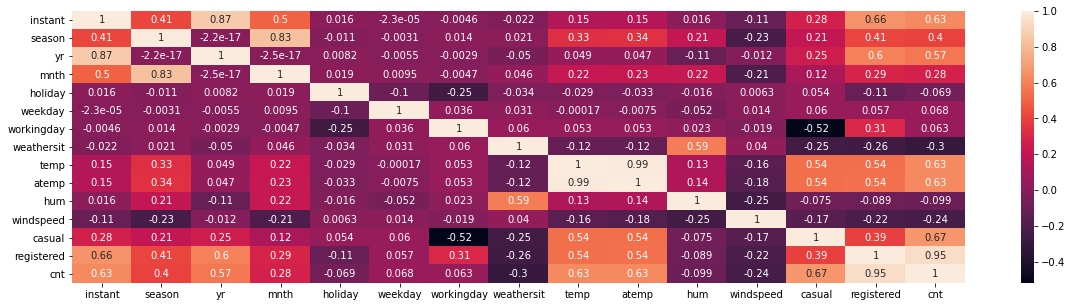

In [90]:
##  check the correlation between the numerical columns in the dataframe

plt.figure(figsize=(20,5))
sns.heatmap(day.corr(),annot=True)

**Observations**
1. There is a strong +ve correlation between demand (cnt) and temperature
2. There is also a strong +ve correlation between demand(cnt) and Yr(year)
2. There is strong correlation between temp and atemp(feels like) 

## Step 3: Data Preparation

Transform numerical variables that are actually categorical variables with meaningful categorical values.  Create dummy variables for the categorical variables. Drop columns that are not significant to analysis and business.  Drop columns with already observed high collinearity

### Dummy Variables

In [91]:
# The season variable has the numerical values (1:spring, 2:summer, 3:fall, 4:winter).  
## Transform the numerical values into respective categorical values
day['season'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [92]:
## Transform the numerical weekday values into respective weekdays.  Please note Tue is '0' and Mon is '6'
day['weekday'] = day['weekday'].map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

In [93]:
## weathersit is encoded with values 1,2,3,4 as below:
## 1: Clear, Few clouds, Partly cloudy, Partly cloudy
## 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
## 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
## 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
## Transform the numerical values into categorical values weathersit1 to 4
day['weathersit'] = day['weathersit'].map({1:'weathersit1',2:'weathersit2',3:'weathersit3',4:'weathersit4'})

In [94]:
## Transform the numerical monthly values into categorical values (1 is Jan, 12 is Dec etc)
day['mnth'] = day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec',})

In [95]:
##  check the head of the dataset for the transformations done
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,weathersit2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,weathersit2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,weathersit1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,weathersit1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,weathersit1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
## create the dummy variables for the categorical variables 
day = pd.get_dummies(data=day, columns=['mnth','season','weekday','weathersit'])

In [97]:
##  check the new columns that are created
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   dteday                  730 non-null    object 
 2   yr                      730 non-null    int64  
 3   holiday                 730 non-null    int64  
 4   workingday              730 non-null    int64  
 5   temp                    730 non-null    float64
 6   atemp                   730 non-null    float64
 7   hum                     730 non-null    float64
 8   windspeed               730 non-null    float64
 9   casual                  730 non-null    int64  
 10  registered              730 non-null    int64  
 11  cnt                     730 non-null    int64  
 12  mnth_Apr                730 non-null    uint8  
 13  mnth_Aug                730 non-null    uint8  
 14  mnth_Dec                730 non-null    ui

In [98]:
##  Drop the 1st variable in each of the dummy variables created for each category variable.  
## Did not use the drop_first=True as intended to drop specific variables for consistency among all the categorical variables
day.drop(columns=['mnth_Jan','season_spring','weekday_Sun','weathersit_weathersit1'],inplace=True)

In [99]:
##  Check the dataframe columns after dropping the 1st dummy variable in each of the categorical varibles
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   dteday                  730 non-null    object 
 2   yr                      730 non-null    int64  
 3   holiday                 730 non-null    int64  
 4   workingday              730 non-null    int64  
 5   temp                    730 non-null    float64
 6   atemp                   730 non-null    float64
 7   hum                     730 non-null    float64
 8   windspeed               730 non-null    float64
 9   casual                  730 non-null    int64  
 10  registered              730 non-null    int64  
 11  cnt                     730 non-null    int64  
 12  mnth_Apr                730 non-null    uint8  
 13  mnth_Aug                730 non-null    uint8  
 14  mnth_Dec                730 non-null    ui

In [100]:
# check the head of the dataframe 
day.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,1,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,1,0,0,0,0,0,0,0


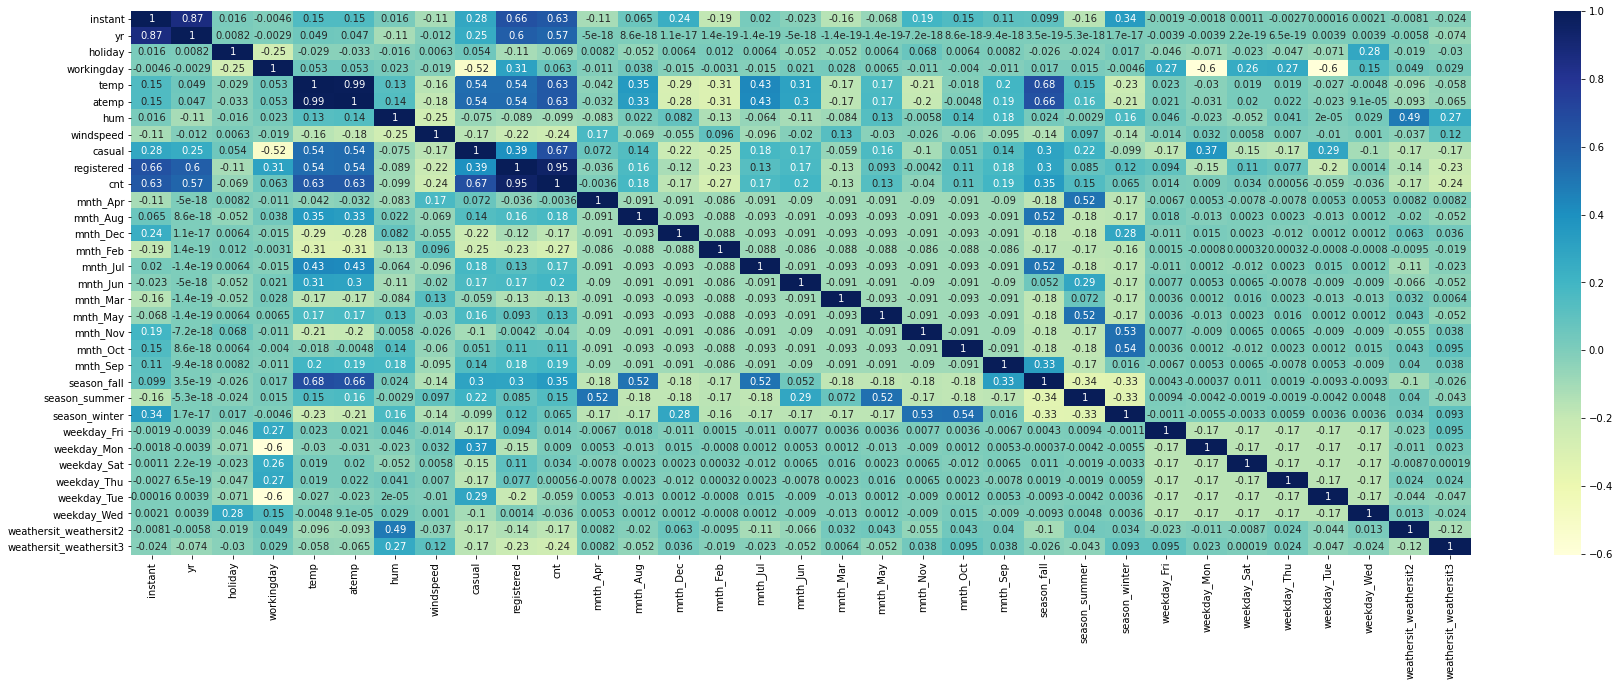

In [101]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [102]:
## drop the columns that are not important to the analysis.  
## Reasons for dropping certain varibles below:
## 1. Instant - this is a counter variables. Hence not useful for the analysis
## 2. casual, registered -  the target variable cnt is a sum of casual and registered. The casual and registered are redundant variables
## 3. atemp -  This variable has a high correlation with temp.  So dropping this varible.  
## 4. workingday - The working day can be dervied from weekday and holiday variables. Also has high correlation to some of the weekday variables
## 5. season_fall - has high correlation with the temp variable
day.drop(columns=['instant','casual','registered','workingday','atemp','season_fall'], axis = 1, inplace = True)

In [103]:
## convert the dteday date from object to datetime format
day['dteday'] = pd.to_datetime(day['dteday'])

In [104]:
### inspect the dataframe after dropping the variables
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dteday                  730 non-null    datetime64[ns]
 1   yr                      730 non-null    int64         
 2   holiday                 730 non-null    int64         
 3   temp                    730 non-null    float64       
 4   hum                     730 non-null    float64       
 5   windspeed               730 non-null    float64       
 6   cnt                     730 non-null    int64         
 7   mnth_Apr                730 non-null    uint8         
 8   mnth_Aug                730 non-null    uint8         
 9   mnth_Dec                730 non-null    uint8         
 10  mnth_Feb                730 non-null    uint8         
 11  mnth_Jul                730 non-null    uint8         
 12  mnth_Jun                730 non-null    uint8     

## Step 4: Splitting the Data into Training and Testing Sets.  Divide the Train data set into X and Y sets

Split the datasets into Train and Testing sets.  Rescale the numerical values to prep the data for the model. Divide the train dataset into X and Y sets.

### Split the dataset into train and test

In [105]:
##  import the train_test_split function from sklearn and split the dataset into Train and 
## Test datasets with 70% and 30% of the data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [106]:
## Inspect the number of rows in the train set
df_train.shape

(510, 28)

In [107]:
## Inspect the number of rows in the test set
df_test.shape

(219, 28)

### Rescaling the Features 

Scale the numerical values temp, humidity, windspeed and cnt using MinMaxscaling so that the coefficients to be obtained from the regression model are not far away from each other

In [108]:
##  describe the numerical values in the dataframe
day.describe()

,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,20.319259,62.765175,12.763620,4508.006849,0.082192,0.084932,0.084932,0.076712,...,0.252055,0.243836,0.141096,0.143836,0.142466,0.142466,0.143836,0.143836,0.336986,0.028767
std,0.500343,0.167266,7.506729,14.237589,5.195841,1936.011647,0.274845,0.278971,0.278971,0.266317,...,0.434490,0.429689,0.348359,0.351164,0.349767,0.349767,0.351164,0.351164,0.473004,0.167266
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
# import MixMaxScaler from scikit learn
from sklearn.preprocessing import MinMaxScaler

In [110]:
## Create a MinMaxscaler object
scaler = MinMaxScaler()

In [111]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [112]:
## check the head of the dataframe to see if the intended variables have been scaled
df_train.head()

,dteday,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
653,2019-10-16,1,0,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,1,0,0,0,0
576,2019-07-31,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,2019-03-03,1,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,2019-12-30,1,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,2019-04-28,1,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [113]:
## describe the dataframe to see if the intended variables have been scaled
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.078431,0.096078,0.084314,0.066667,...,0.245098,0.24902,0.158824,0.154902,0.133333,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.269113,0.294988,0.278131,0.249689,...,0.430568,0.43287,0.365870,0.362166,0.340268,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The intended variables temp, hum, windspeed, cnt have been scaled between 0 and 1 as expected

### Dividing into X and Y sets for the model building

In [114]:
## sort the train set by dteday.  Doing this to finally do a plotting ordered by date
df_train = df_train.sort_values(by='dteday')

In [115]:
##  check the head of the dataframe
df_train.head()

,dteday,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
0,2018-01-01,0,0,0.355170,0.830399,0.253982,0.110792,0,0,0,...,0,0,0,1,0,0,0,0,1,0
59,2018-01-03,0,0,0.258601,0.551309,0.374325,0.210423,0,0,0,...,0,0,0,0,0,1,0,0,0,0
90,2018-01-04,0,0,0.300135,0.707170,0.465226,0.253682,1,0,0,...,1,0,0,0,0,0,0,0,1,0
120,2018-01-05,0,0,0.489120,0.785315,0.137694,0.382996,0,0,0,...,1,0,0,0,0,0,1,0,1,0
151,2018-01-06,0,0,0.878510,0.697724,0.354261,0.454671,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [116]:
## Divide the train set into the X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Perform the feature selection and build the linear model

### Select the top features using RFE

In [117]:
# Importing RFE and LinearRegression fro scikit learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [118]:
## exclude the dteday column from the list of predictors
col_excl = ['dteday']
cols_incl = ~X_train.columns.isin(col_excl)
X_train = X_train[X_train.columns[cols_incl]]

In [119]:
# Run RFE to get 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [120]:
##  print the output of the RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Apr', False, 2),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jul', False, 4),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Fri', False, 11),
 ('weekday_Mon', False, 12),
 ('weekday_Sat', False, 10),
 ('weekday_Thu', False, 9),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 8),
 ('weathersit_weathersit2', True, 1),
 ('weathersit_weathersit3', True, 1)]

In [121]:
## get the list of columns selected by RFE (i.e rfe_support = True)
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Aug', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sep', 'season_summer', 'season_winter',
       'weekday_Tue', 'weathersit_weathersit2', 'weathersit_weathersit3'],
      dtype='object')

In [122]:
## print the list of columns not selected by RFE (i.e rfe_support = False)
X_train.columns[~rfe.support_]

Index(['mnth_Apr', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun', 'mnth_Nov',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Thu',
       'weekday_Wed'],
      dtype='object')

### Adding the variables selected by RFE to the model  - Model 1 

In [123]:
#Build a linear model using the statsmodel

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train[col])

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                     0.239591
yr                        0.229137
holiday                  -0.098815
temp                      0.532598
hum                      -0.176973
windspeed                -0.186226
mnth_Aug                  0.059948
mnth_Mar                  0.024341
mnth_May                  0.023751
mnth_Oct                  0.041439
mnth_Sep                  0.128777
season_summer             0.096426
season_winter             0.139419
weekday_Tue              -0.044950
weathersit_weathersit2   -0.057860
weathersit_weathersit3   -0.247185
dtype: float64

In [124]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          7.77e-192
Time:                        19:27:16   Log-Likelihood:                 521.01
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     494   BIC:                            -942.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Some of the variables seem to be very insignificant based on high p-values. Consider dropping those variables in conjunction with VIF to be calcualted below. The p(F-statistic), R-squared, Adj R-squared parameters are good.  

### Checking VIF

Check the VIF of the variables in the linear model

In [125]:
# import the variance_inflation_factor from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,10.03
4,windspeed,3.75
11,season_winter,2.35
10,season_summer,2.31
13,weathersit_weathersit2,2.16
0,yr,2.03
7,mnth_May,1.63
5,mnth_Aug,1.62
8,mnth_Oct,1.61


Some variables have very high VIF.  So we need to consider dropping some of the variables

### Dropping the variable and updating the model  - Model 2

The variable Mnth_May has very high p-value.  Drop this variable from the model and check the statistical parameters

In [127]:
## remove the variable Mnth_may from the model
col_excl = ['mnth_May']
col_2 = [x  for x in col if x not in col_excl]
col_2

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'mnth_Aug',
 'mnth_Mar',
 'mnth_Oct',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [128]:
#Build a linear model using the statsmodel
X_train_lm = sm.add_constant(X_train[col_2])

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const                     0.235275
yr                        0.228769
holiday                  -0.099563
temp                      0.534675
hum                      -0.169302
windspeed                -0.187329
mnth_Aug                  0.058056
mnth_Mar                  0.021318
mnth_Oct                  0.040811
mnth_Sep                  0.127011
season_summer             0.103930
season_winter             0.138657
weekday_Tue              -0.045161
weathersit_weathersit2   -0.058150
weathersit_weathersit3   -0.249612
dtype: float64

In [129]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.37e-192
Time:                        19:27:16   Log-Likelihood:                 520.05
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Some of the variables seem to be very insignificant based on high p-values.  Consider dropping those variables in conjunction with VIF to be calcualted below. The p(F-statistic), R-squared, Adj R-squared parameters are good.  

### Checking VIF
Check the VIF of the variables in the linear model

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_2]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.04
2,temp,10.01
4,windspeed,3.70
10,season_winter,2.34
12,weathersit_weathersit2,2.15
0,yr,2.02
9,season_summer,1.83
5,mnth_Aug,1.61
7,mnth_Oct,1.61
8,mnth_Sep,1.35


Some variables have very high VIF.  So we need to consider dropping some of the variables

### Dropping the variable and updating the model - Model 3

The variable Mnth_Mar has very high p-value.  Drop this variable from the model and check the statistical parameters

In [131]:
## remove the variable Mnth_may from the model
col_excl = ['mnth_May','mnth_Mar']
col_3 = [x  for x in col if x not in col_excl]
col_3

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'mnth_Aug',
 'mnth_Oct',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [132]:
#Build a linear model using the statsmodel

X_train_lm = sm.add_constant(X_train[col_3])

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const                     0.241222
yr                        0.228935
holiday                  -0.101889
temp                      0.529618
hum                      -0.170327
windspeed                -0.185035
mnth_Aug                  0.056225
mnth_Oct                  0.041136
mnth_Sep                  0.125557
season_summer             0.103863
season_winter             0.135019
weekday_Tue              -0.045938
weathersit_weathersit2   -0.058081
weathersit_weathersit3   -0.248259
dtype: float64

In [133]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.92e-193
Time:                        19:27:16   Log-Likelihood:                 518.85
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     496   BIC:                            -950.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

All the variable have a p-value less than 0.05 and hence seem significant.  Let's check the VIF. The p(F-statistic), R-squared, Adj R-squared parameters are good.  

### Checking VIF

Check the VIF of the variables in the linear model

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_3]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.67
2,temp,9.88
4,windspeed,3.59
9,season_winter,2.27
11,weathersit_weathersit2,2.15
0,yr,2.02
8,season_summer,1.83
6,mnth_Oct,1.61
5,mnth_Aug,1.60
7,mnth_Sep,1.34


Some variables have very high VIF(>5).  So we need to consider dropping some of the variables

### Dropping the variable and updating the model - Model 4

The variable 'hum' has very VIF.  Drop this variable from the model and check the statistical parameters

In [135]:
## remove the variable Mnth_may from the model
col_excl = ['mnth_May','mnth_Mar','hum']
col_4 = [x  for x in col if x not in col_excl]
col_4

['yr',
 'holiday',
 'temp',
 'windspeed',
 'mnth_Aug',
 'mnth_Oct',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [136]:
#Build a linear model using the statsmodel
X_train_lm = sm.add_constant(X_train[col_4])

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const                     0.144069
yr                        0.232692
holiday                  -0.103856
temp                      0.509186
windspeed                -0.152129
mnth_Aug                  0.054524
mnth_Oct                  0.037168
mnth_Sep                  0.118940
season_summer             0.100717
season_winter             0.126882
weekday_Tue              -0.049433
weathersit_weathersit2   -0.085393
weathersit_weathersit3   -0.294199
dtype: float64

In [137]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.27e-190
Time:                        19:27:16   Log-Likelihood:                 508.13
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

All the variables have p-value less than 0.05 and hence significant. Let's check the VIF. The p(F-statistic), R-squared, Adj R-squared parameters are good.  

### Checking VIF
Check the VIF of the variables in the linear model

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_4]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.18
3,windspeed,3.13
0,yr,2.00
8,season_winter,1.95
7,season_summer,1.82
4,mnth_Aug,1.60
5,mnth_Oct,1.60
10,weathersit_weathersit2,1.49
6,mnth_Sep,1.34
9,weekday_Tue,1.17


Some variables have very high VIF(>5).  So we need to consider dropping some of the variables

### Dropping the variable and updating the model - Model 5

The variable temp has very VIF > 5 .  Drop this variable from the model and check the statistical parameters

In [139]:
## remove the variable Mnth_may from the model
col_excl = ['mnth_May','mnth_Mar','hum','temp']
col_5 = [x  for x in col if x not in col_excl]
col_5

['yr',
 'holiday',
 'windspeed',
 'mnth_Aug',
 'mnth_Oct',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [140]:
#Build a linear model using the statsmodel
X_train_lm = sm.add_constant(X_train[col_5])

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const                     0.414078
yr                        0.250055
holiday                  -0.127770
windspeed                -0.250180
mnth_Aug                  0.221260
mnth_Oct                  0.114474
mnth_Sep                  0.243209
season_summer             0.167036
season_winter             0.081333
weekday_Tue              -0.049243
weathersit_weathersit2   -0.115787
weathersit_weathersit3   -0.307394
dtype: float64

In [141]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     91.68
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.00e-112
Time:                        19:27:16   Log-Likelihood:                 320.78
No. Observations:                 510   AIC:                            -617.6
Df Residuals:                     498   BIC:                            -566.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

The R-squared and Adjusted R-squared value dropped from 0.84 to 0.66 after dropping temp. So looks not appropriate to drop this variable. Let's check VIF also

### Checking VIF

Check the VIF of the variables in the linear model

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_5]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.49
7,season_winter,1.92
0,yr,1.82
4,mnth_Oct,1.57
6,season_summer,1.52
9,weathersit_weathersit2,1.48
3,mnth_Aug,1.16
8,weekday_Tue,1.15
5,mnth_Sep,1.11
10,weathersit_weathersit3,1.10


The VIF of the variables are good.  However this model needs to be revisited as the R-squared has dropped significantly

### Dropping the variable and updating the model  - Model 6


We need to bring the temp variable back into the model.  See if there is any multicollinearity that could be causing high VIF for temp variable

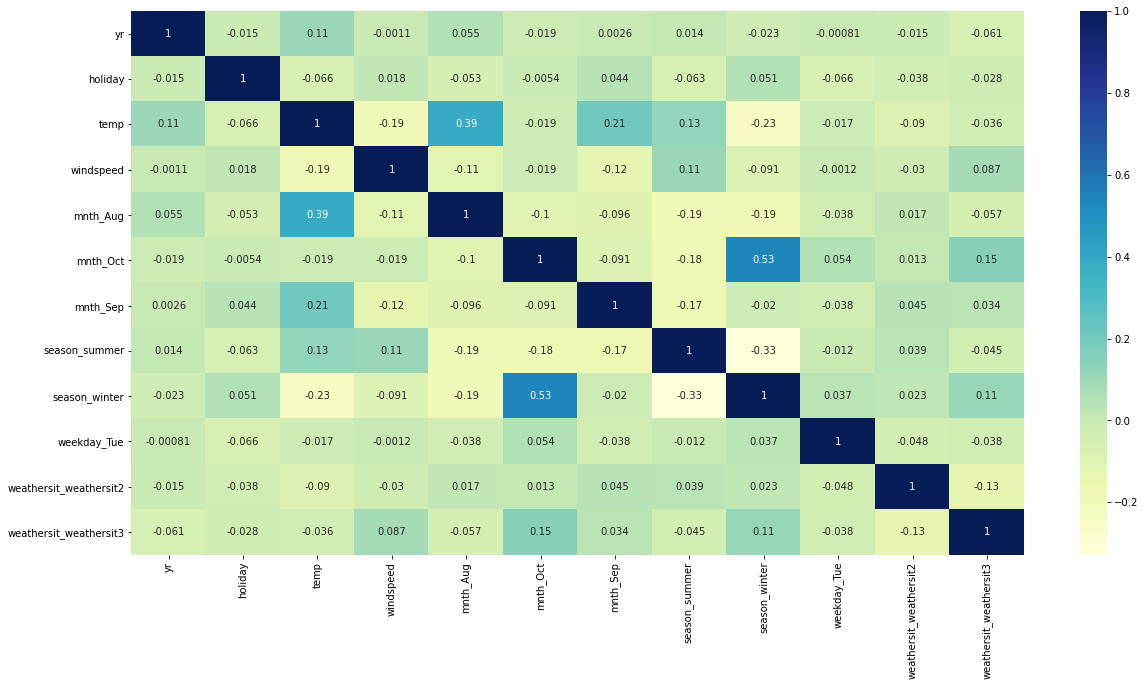

In [143]:
## Check the correlation between the varibles and check the correlation with temp variable
plt.figure(figsize = (20, 10))
sns.heatmap(X_train[col_4].corr(), annot = True, cmap="YlGnBu")
plt.show()


Adding the temp back to the model.  The high VIF of temp could be due to the variable mnth_Aug as it has some correlation with temp.  Drop the mnth_Aug variable from the model and check the VIF of temp

In [144]:
## remove the variable Mnth_Oct from the model and add the variable temp back into the model
col_excl = ['mnth_May','mnth_Mar','hum','mnth_Aug']
col_6 = [x  for x in col if x not in col_excl]
col_6

['yr',
 'holiday',
 'temp',
 'windspeed',
 'mnth_Oct',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [145]:
#Build a linear model using the statsmodel
X_train_lm = sm.add_constant(X_train[col_6])

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const                     0.138848
yr                        0.232940
holiday                  -0.106372
temp                      0.541076
windspeed                -0.155311
mnth_Oct                  0.031769
mnth_Sep                  0.103034
season_summer             0.087369
season_winter             0.121030
weekday_Tue              -0.050904
weathersit_weathersit2   -0.082543
weathersit_weathersit3   -0.294493
dtype: float64

In [146]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.22e-189
Time:                        19:27:17   Log-Likelihood:                 502.52
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

The R-squared and Adjusted R-squared of the model has returned back to the earlier model of 0.84. However The p-value of mnth_Oct seem to be very insignificant based on high p-values (> 0.05).  Consider dropping this variable in conjunction with VIF to be calculated below.  The p(F-statistic) is good.  

### Checking VIF

Check the VIF of the variables in the linear model

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_6]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.77
3,windspeed,3.09
0,yr,2.00
7,season_winter,1.88
4,mnth_Oct,1.59
6,season_summer,1.57
9,weathersit_weathersit2,1.48
5,mnth_Sep,1.23
8,weekday_Tue,1.17
10,weathersit_weathersit3,1.10


The VIF of temp has decreased to 3.77 ( less than 5).  So the correlation between temp and mnth_Aug has increased the VIF of temp.  

### Dropping the variable and updating the model  - Model 7

The variable mnth_Oct has very high p-value.  Drop this variable from the model and check the statistical parameters

In [148]:
## remove the variable Mnth_Oct from the model and add the variable temp back into the model
col_excl = ['mnth_May','mnth_Mar','hum','mnth_Aug','mnth_Oct']
col_7 = [x  for x in col if x not in col_excl]
col_7

['yr',
 'holiday',
 'temp',
 'windspeed',
 'mnth_Sep',
 'season_summer',
 'season_winter',
 'weekday_Tue',
 'weathersit_weathersit2',
 'weathersit_weathersit3']

In [149]:
#Build a linear model using the statsmodel
X_train_lm = sm.add_constant(X_train[col_7])

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const                     0.134956
yr                        0.232661
holiday                  -0.107197
temp                      0.547141
windspeed                -0.153106
mnth_Sep                  0.099241
season_summer             0.086611
season_winter             0.132288
weekday_Tue              -0.049981
weathersit_weathersit2   -0.081871
weathersit_weathersit3   -0.289246
dtype: float64

In [150]:
## print the lr summary and check the r-squared, p(f-stat), p-values of the coefficients
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.88e-189
Time:                        19:27:17   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

The p-values of all the variables is 0.  The r-squared is also good at 0.837 and adjusted r-square at 0.834. The p(F-statistic) is also good.  Let's check the VIF also

### Checking VIF

Check the VIF of the variables in the linear model

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_vif =  X_train[col_7]
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,yr,2.00
5,season_summer,1.56
8,weathersit_weathersit2,1.48
6,season_winter,1.39
4,mnth_Sep,1.21
7,weekday_Tue,1.16
9,weathersit_weathersit3,1.08
1,holiday,1.04


The VIF of all the variables are also less than 5.

### Based on the model parameters R-squared, Adjusted R-squared, p(F-statistic), p-values of the coefficients, VIF of all the variables , the Model 7 is concluded to be the final fitted model

## Step 7: Residual Analysis of the train data

Check if the error terms are also normally distributed 

In [152]:
## predict the demand(cnt) using the fitted model
y_pred = lr_7.predict(X_train_lm)

Text(0, 0.5, 'y_pred')

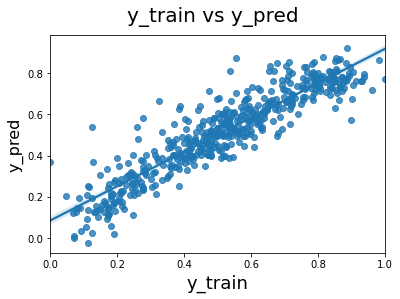

In [153]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(y_train, y_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

Text(0.5, 0, 'Theoritical normal quantiles')

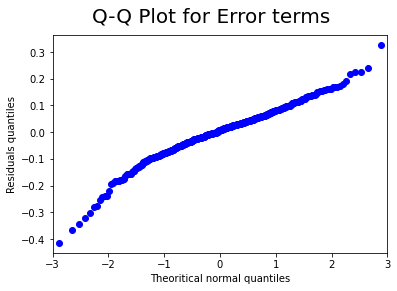

In [154]:
## create a q-q plot to check the normal distribution.
fig = sm.qqplot(y_train - y_pred)
fig.suptitle('Q-Q Plot for Error terms ', fontsize = 20) 
plt.ylabel('Residuals quantiles')
plt.xlabel('Theoritical normal quantiles')

Text(0.5, 0, 'Errors')

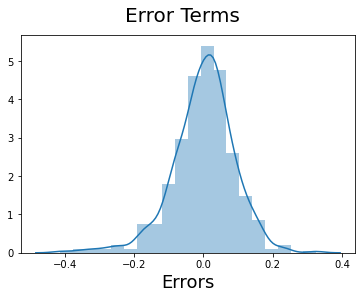

In [155]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The errors terms are normally distributed as seen in the q-q plot and histogram

In [156]:
### check the mean of the error terms
lr_7.resid.mean()

-3.875440273703794e-16

The mean of the error terms is very close to 0

Text(0.5, 0, 'y-pred')

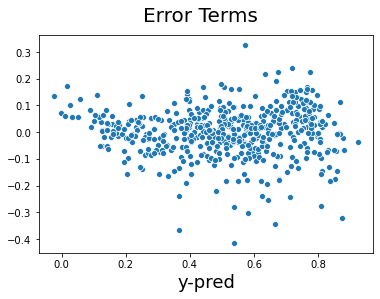

In [157]:
## check the independence and the variance of the error terms 
fig = plt.figure()
sns.scatterplot(y_pred,(y_train - y_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y-pred', fontsize = 18)                         # X-label

The errors terms appear to be randomly disributed (independent) and the variance of the error terms also seem mostly constant

Text(0, 0.5, 'Views')

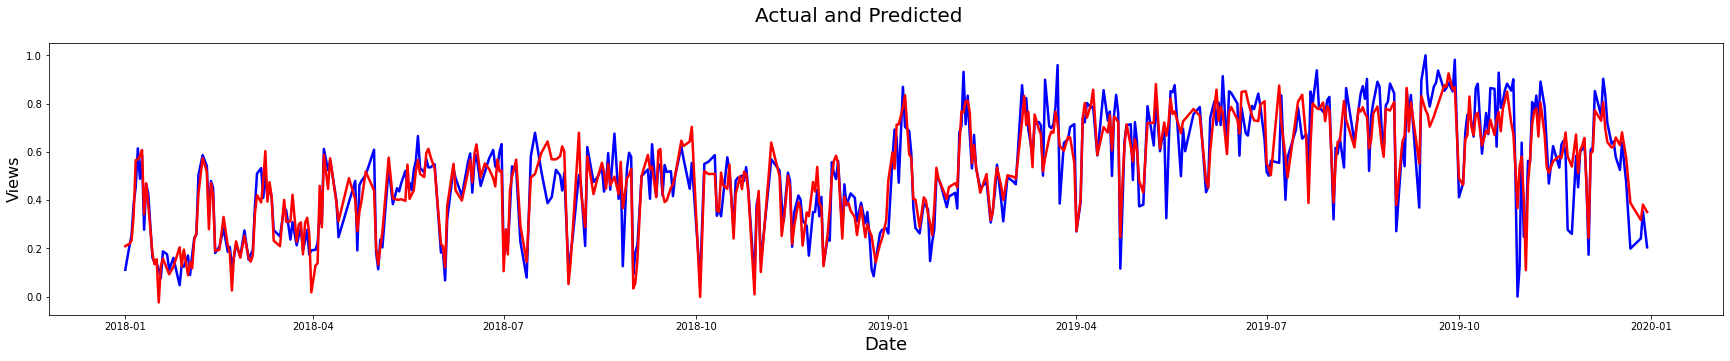

In [158]:
#plot the Actual vs Predicted values across dates
fig = plt.figure(figsize=(30,5))
plt.plot(df_train['dteday'],y_train.values, color="blue", linewidth=2.5, linestyle="-")
plt.plot(df_train['dteday'],y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Date', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

The peaks and valleys of the actual vs pred y values conincide at many points indicating a good model

## Step 8: Making Predictions Using the Final Model

Make the predictions on the test set using the fitted model 

#### Applying the scaling on the test sets

In [159]:
##  apply the scaling on the test dataset.  Please note this only transform
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [160]:
## describe the values to check if the scaling has worked
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.638508,0.313350,0.520592,0.091324,0.059361,0.086758,0.100457,...,0.264840,0.232877,0.100457,0.118721,0.164384,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.233698,0.148974,0.159947,0.218435,0.288730,0.236840,0.282125,0.301297,...,0.442259,0.423633,0.301297,0.324202,0.371472,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759096,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [161]:
## sort the df_test by the dteday. this will be used for the plotting
df_test = df_test.sort_values(by='dteday')

In [162]:
## check the head of the dataframe
df_test.head()

,dteday,yr,holiday,temp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_weathersit2,weathersit_weathersit3
31,2018-01-02,0,0,0.165779,0.854854,0.023452,0.153935,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12,2018-01-13,0,0,0.131919,0.484758,0.556145,0.159227,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19,2018-01-20,0,0,0.252371,0.554744,0.330209,0.219167,0,0,0,...,0,0,0,0,1,0,0,0,1,0
22,2018-01-23,0,0,0.046591,0.449829,0.439196,0.110907,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,2018-01-25,0,0,0.204785,0.635765,0.188090,0.225840,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [163]:
## create the X and Y sets for the test set
y_test = df_test.pop('cnt')
X_test = df_test

#### Make the predictions using the fitted model

In [164]:
# Adding constant variable to test dataframe
X_test_m7 = sm.add_constant(X_test[col_7])

In [165]:
# Making predictions using the fitted model

y_test_pred = lr_7.predict(X_test_m7)

## Step 9: Model Evaluation

Check the r-squared of the test set. Also Let's now plot the graph for actual versus predicted values and validate the error term assumptions

In [166]:
## check the r-squared of the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7958272128950747

The r-squared value of the test is 0.795 compared to the r-squared value of the train set (0.83).  
However this in the acceptable range

Text(0, 0.5, 'y_test_pred')

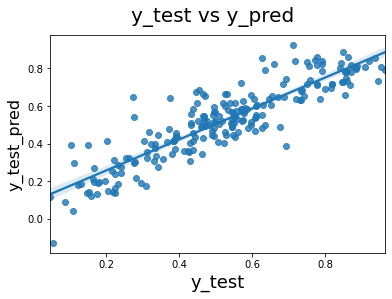

In [167]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

The y-test and y-pred have good correlation meaning these are closer to each other

Text(0.5, 0, 'Theoritical normal quantiles')

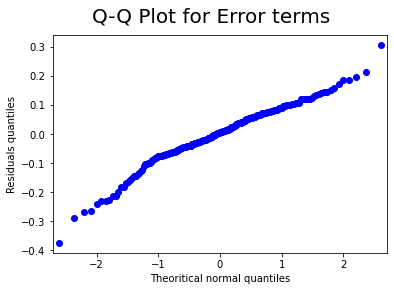

In [168]:
## create a q-q plot to check the normal distribution.
fig = sm.qqplot(y_test - y_test_pred)
fig.suptitle('Q-Q Plot for Error terms ', fontsize = 20) 
plt.ylabel('Residuals quantiles')
plt.xlabel('Theoritical normal quantiles')

Text(0.5, 0, 'Errors')

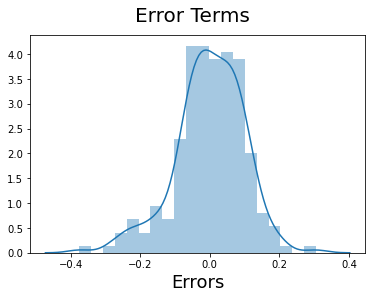

In [169]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are mostly normally distributed as visualized in the q-q plot and the histogram

Text(0.5, 0, 'y_test_pred')

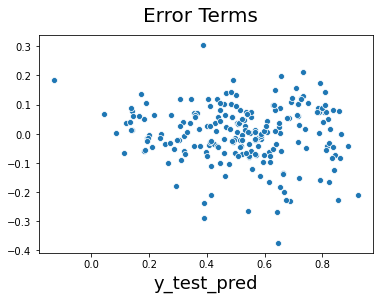

In [170]:
fig = plt.figure()
sns.scatterplot(y_test_pred,(y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('y_test_pred', fontsize = 18)                         # X-label

The errors terms appear to be randomly disributed (independent) and the variance of the error terms also seem mostly constant

Text(0, 0.5, 'Views')

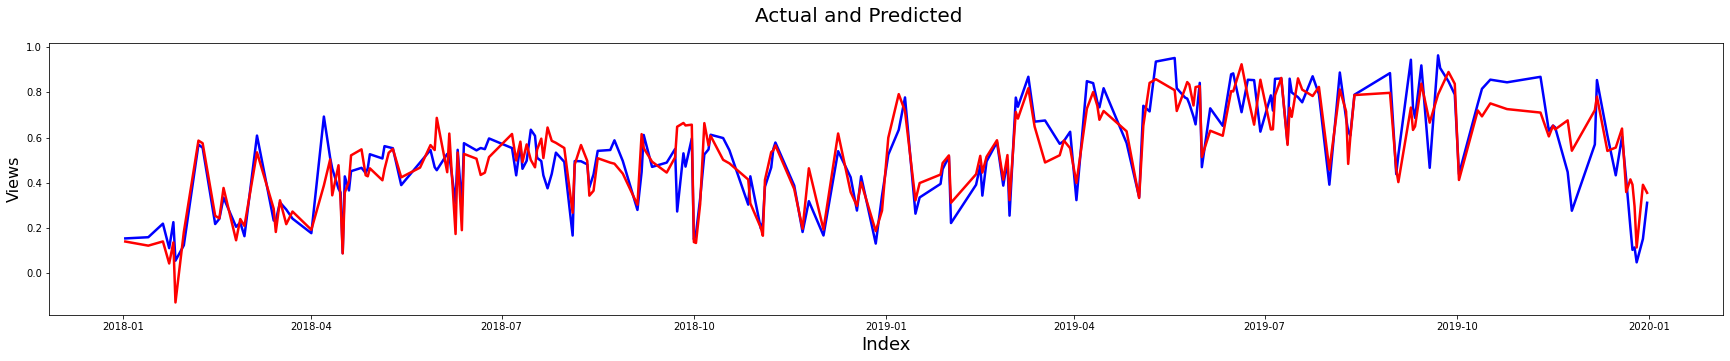

In [171]:
#Actual vs Predicted
fig = plt.figure(figsize=(30,5))
plt.plot(df_test['dteday'],y_test.values, color="blue", linewidth=2.5, linestyle="-")
plt.plot(df_test['dteday'],y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

The peaks and valleys of the actual vs pred y values conincide at many points indicating a good model

In [172]:
print('End of Assignment')

End of Assignment
